# Libraries

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

import torch

from pathlib import Path

In [ ]:
# Set the font family for math symbols
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

# Fcn

In [ ]:
def to_width(x):
    return x*0.3125

# Paths

In [ ]:
home_path = Path.home()

base = home_path / 'base'
data_path = base / 'data'
ml_data_path = data_path / 'ML'
ppv_data_path = ml_data_path / 'ppv'

train_data_path = ml_data_path / 'train'
ksize_path = train_data_path / 'ksize'

# GPU or CPU

In [7]:
# GPU or CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device: ', device)

device:  cpu


In [8]:
torch.cuda.device_count()

0

# Kernel Size: CNN (1split)

In [ ]:
ksize_list = [2, 3, 9, 17, 25, 27, 35, 39, 45]
file_list  = [ksize_path / ('cnn_original_vector_c256_ks_' + str(x) + '.csv') for x in ksize_list]
n = len(ksize_list)

In [10]:
valid_mean_mse_arr = np.zeros(n)
valid_std_mse_arr = np.zeros(n)

test_mean_mse_arr = np.zeros(n)
test_std_mse_arr = np.zeros(n)

valid_mean_mse_arr_list = []
test_mean_mse_arr_list  = []

for (i, csvfile) in enumerate(file_list):
  df = pd.read_csv(csvfile)

  valid_mse_values = np.sqrt(df.valid_err.values)
  test_mse_values  = np.sqrt(df.test_err.values)

  valid_mean_mse_arr_list.append(valid_mse_values)
  test_mean_mse_arr_list.append(test_mse_values)

  valid_mean_mse = np.median(valid_mse_values)
  valid_std_mse  = valid_mse_values.std()

  test_mean_mse  = np.median(test_mse_values)
  test_std_mse   = test_mse_values.std()

  valid_mean_mse_arr[i] = valid_mean_mse
  valid_std_mse_arr[i] = valid_std_mse

  test_mean_mse_arr[i] = test_mean_mse
  test_std_mse_arr[i] = test_std_mse

In [12]:
for m,s,xi in zip(valid_mean_mse_arr, valid_std_mse_arr, ksize_list):
  print(f"Valid MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Valid MSE: Mean=0.094315, std=0.001137  for 2
Valid MSE: Mean=0.088694, std=0.000913  for 3
Valid MSE: Mean=0.081312, std=0.000723  for 9
Valid MSE: Mean=0.082885, std=0.000483  for 17
Valid MSE: Mean=0.080367, std=0.000286  for 25
Valid MSE: Mean=0.082027, std=0.000910  for 27
Valid MSE: Mean=0.077233, std=0.000756  for 35
Valid MSE: Mean=0.078145, std=0.000012  for 39
Valid MSE: Mean=0.080265, std=0.000000  for 45


In [13]:
for m,s,xi in zip(test_mean_mse_arr, test_std_mse_arr, ksize_list):
  print(f"Test MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Test MSE: Mean=0.095084, std=0.001489  for 2
Test MSE: Mean=0.087771, std=0.000580  for 3
Test MSE: Mean=0.085238, std=0.000710  for 9
Test MSE: Mean=0.083233, std=0.000268  for 17
Test MSE: Mean=0.083163, std=0.000625  for 25
Test MSE: Mean=0.081184, std=0.000979  for 27
Test MSE: Mean=0.079261, std=0.000552  for 35
Test MSE: Mean=0.075268, std=0.000070  for 39
Test MSE: Mean=0.080666, std=0.000000  for 45


In [18]:
nlen = len(valid_mean_mse_arr_list)
test_rmse_arr = np.zeros(nlen)
test_sigrmse_arr = np.zeros(nlen)
for k, (x,y) in enumerate(zip(valid_mean_mse_arr_list, test_mean_mse_arr_list)):
    xtemp = np.concatenate((x,y))
    rmse_i = np.median(xtemp)
    sigrmse_i = np.std(xtemp)
    test_rmse_arr[k] = rmse_i
    test_sigrmse_arr[k] = sigrmse_i

In [19]:
filter_indices = [1, 2, 3, 4, 6, 7, 8]
test_rmse_arr = test_rmse_arr[filter_indices]
test_sigrmse_arr = test_sigrmse_arr[filter_indices]

ksize_list = [3, 9, 17, 25, 35, 39, 45]

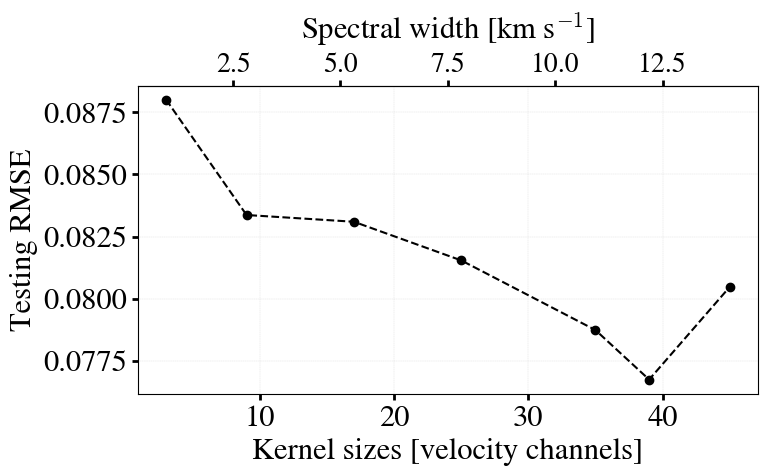

In [ ]:
# Set font to Times New Roman
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"


fig, ax = plt.subplots(figsize=(8,4), nrows=1, sharex=True)

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'grey'},
    'medianprops':{'color':'grey'},
    'whiskerprops':{'color':'grey'},
    'capprops':{'color':'grey'}
}

ax.plot(ksize_list, test_rmse_arr, 'ko', zorder=2, label='')
ax.plot(ksize_list, test_rmse_arr, 'k--', zorder=2, label='')


ax.set_xlabel('Kernel sizes [velocity channels]', fontsize=22)
ax.set_ylabel('Testing RMSE', fontsize=22)
ax.tick_params(axis='both', which='both', length=6, width=1, labelsize=16)


ax.tick_params(axis='x', labelsize=22, pad=4)
ax.tick_params(axis='y', labelsize=22)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=4)
ax.tick_params(which='minor', length=2)

ax.grid(True, linestyle='--', linewidth=0.25, color='lightgray', zorder=-10)



secax = ax.secondary_xaxis('top', functions=(to_width, to_width))
secax.set_xlabel('Spectral width [km s$^{-1}$]', fontsize=22, labelpad=10)

secax.tick_params(axis='x', labelsize=20, pad=2)
secax.tick_params(which='both', width=2)
secax.tick_params(which='major', length=4)
secax.tick_params(which='minor', length=2)




# set the spacing between subplots
plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0.,
                    hspace=0.05
                    )



plt.show()

# End